In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import joblib
import sys
import os

sys.path.append(os.path.abspath('..'))

from utils.prediction import predict_sentiment

/home/lucchuong/Documents/sentiment-classification/training/venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Load model & dữ liệu  
model = joblib.load('../models/best_sentiment_model.pkl')

# Load dữ liệu test - cần chia lại giống như trong training
embeddings = np.load('../data/processed/embeddings.npy')
labels = np.load('../data/processed/labels.npy')

# Chia giống như trong 03_training.ipynb
from sklearn.model_selection import train_test_split
_, X_test, _, y_test = train_test_split(
    embeddings, labels, test_size=0.2, random_state=42, stratify=labels
)

print(f"✓ Đã load model và dữ liệu test ({len(X_test)} mẫu)")
print(f"Phân bố test set: Negative={(y_test==0).sum()}, Positive={(y_test==1).sum()}")

✓ Đã load model và dữ liệu test (4565 mẫu)
Phân bố test set: Negative=1097, Positive=3468


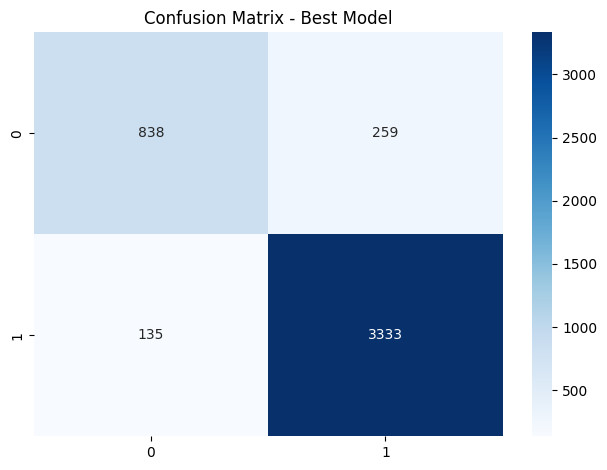

In [3]:
# Confusion matrix
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Best Model")

os.makedirs('../results/figures/evaluation', exist_ok=True)
plt.tight_layout()
plt.savefig('../results/figures/evaluation/confusion_matrix_best_model.png')

plt.show()

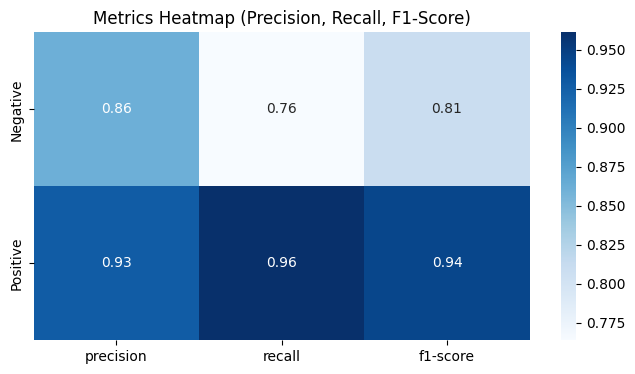

In [4]:
# 04_evaluation.ipynb

# # Báo cáo chi tiết
# print(classification_report(y_test, y_pred, target_names=['Negative', 'Neutral', 'Positive']))

# # Test thực tế
# test_reviews = [
#     "Sản phẩm tuyệt vời, tôi rất thích",
#     "Bình thường, không có gì đặc biệt",
#     "Rất tệ, thất vọng",
# ]

# for r in test_reviews:
#     print(predict_sentiment(r, model))

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import classification_report

# ----------------------------------------------------------------
# Giả sử bạn đã có y_test và y_pred từ bước trước
# y_test = ...
# y_pred = ... (kết quả dự đoán của model trên y_test)
# ----------------------------------------------------------------

# 1. Lấy báo cáo ở dạng dictionary (thay vì string)
report_dict = classification_report(y_test, y_pred, 
                                    target_names=['Negative', 'Positive'], 
                                    output_dict=True)

# 2. Chuyển phần báo cáo của các lớp chính sang DataFrame của Pandas
df_report = pd.DataFrame(report_dict).transpose()

# 3. Lọc ra các chỉ số cho 3 lớp (bỏ qua accuracy, macro avg...)
df_class_metrics = df_report.loc[['Negative', 'Positive'], 
                                 ['precision', 'recall', 'f1-score']]

# 4. Vẽ Heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(df_class_metrics, 
            annot=True,     # Hiển thị con số lên ô
            fmt='.2f',      # Định dạng số (2 chữ số thập phân)
            cmap='Blues')   # Dùng thang màu xanh
plt.title('Metrics Heatmap (Precision, Recall, F1-Score)')
plt.show()